# Real Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge,LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
import numpy as np
import imageio.v2 as imageio
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
# Load the terrain
terrain = imageio.imread('SRTM_data_Norway_1.tif')

# Design Matrix creation and target variable
terrain_sample=terrain[:50,:50]
height, width = terrain_sample.shape

x = np.arange(0, width)
y = np.arange(0, height) 

x, y = np.meshgrid(x, y)
X = np.column_stack((x.ravel(), y.ravel()))
z = terrain_sample.ravel()

# Splitting into train and test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=32)
# Splitting into train and validation
X_train, X_val, z_train, z_val = train_test_split(X_train, z_train, test_size=0.1, random_state=32)

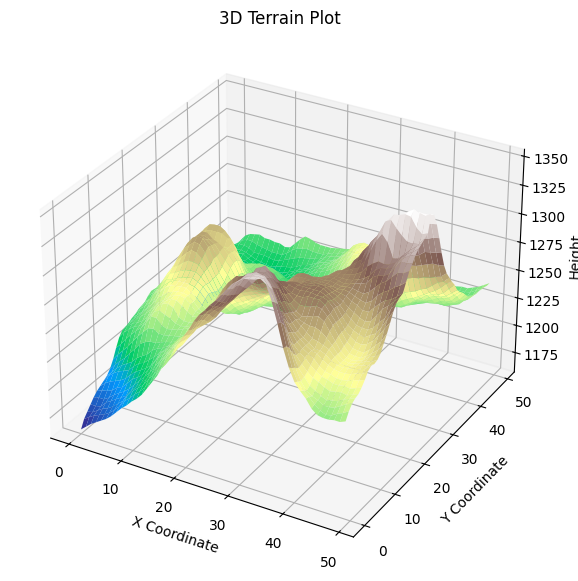

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from sklearn.model_selection import train_test_split

# Load the terrain
terrain = imageio.imread('SRTM_data_Norway_1.tif')

# Design Matrix creation and target variable
terrain_sample = terrain[:50, :50]
height, width = terrain_sample.shape

x = np.arange(0, width)
y = np.arange(0, height)

x, y = np.meshgrid(x, y)
X = np.column_stack((x.ravel(), y.ravel()))
z = terrain_sample.ravel()

# Splitting into train and test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=32)
# Splitting into train and validation
X_train, X_val, z_train, z_val = train_test_split(X_train, z_train, test_size=0.1, random_state=32)

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
ax.plot_surface(x, y, terrain_sample, cmap='terrain', edgecolor='none')

# Labeling axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Height')
ax.set_title('3D Terrain Plot')

plt.savefig("REAL_DATA_3d.png")
plt.show()


## OLS

Model having 1 degree has 570.3751044224639 MSE
Model having 2 degree has 374.33892400544676 MSE
Model having 3 degree has 330.7658081381752 MSE
Model having 4 degree has 192.43029608349212 MSE
Model having 5 degree has 142.86723565861175 MSE
Model having 6 degree has 67.84750186655387 MSE
Model having 7 degree has 49.28548134604425 MSE
Model having 8 degree has 32.56638500986547 MSE
Model having 9 degree has 26.54151482384277 MSE
Model having 10 degree has 23.80463285962051 MSE
Model having 11 degree has 20.37397372507007 MSE
Model having 12 degree has 20.62640494820209 MSE
Model having 13 degree has 15.818153079475378 MSE
Model having 14 degree has 14.784513094396145 MSE
Model having 15 degree has 12.668205801801136 MSE
Model having 16 degree has 10.429588027146412 MSE
Model having 17 degree has 6.307080503305096 MSE
Model having 18 degree has 10.42056797917513 MSE
Model having 19 degree has 5.298276555773371 MSE
Model having 20 degree has 5.940503378526807 MSE
Model having 21 degree

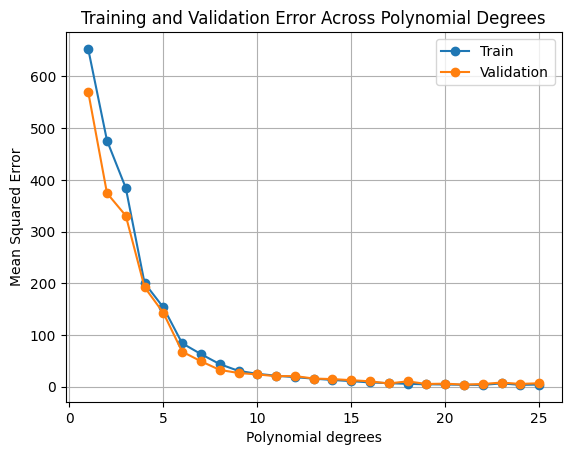

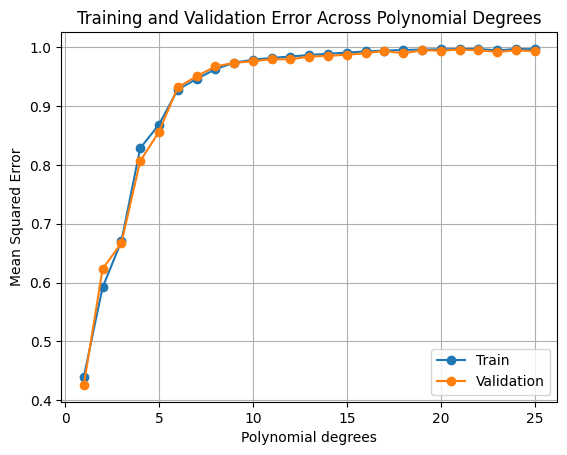

The best model has 21 degree(s) having an MSE of 4.0574.


In [4]:
def ols(X_train, X_val, z_train, z_val, start_degree, degree, plot = False):
    ''' 
    Performs Ordinary Least Squares (OLS) regression with polynomial feature expansion.
    For polynomial degrees ranging from `start_degree` to `degree`
    Model with the lowest validation MSE is selected as the "best model". 
    
    Input Parameters:
    X_train :The training feature matrix.
    X_val :The validation feature matrix.
    z_train :The target vector for training.
    z_val :The target vector for validation.
    start_degree :The starting polynomial degree.
    degree :The maximum polynomial degree to evaluate.
    plot :Whether or not to plot beta coefficients, MSE, and R² for training and validation data.
    '''
    mse_train = []
    mse_val = []
    R2_train = []
    R2_val = []
    betas = []
    best_model = []
    
    for i in range(start_degree, degree + 1):
       
        # Generate polynomial features for each degree
        poly = PolynomialFeatures(degree=i)

        # Transform the original training and testing sets without overwriting
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        
        # Scaling Data
        scaler = StandardScaler()
        X_train_poly[:, 1:] = scaler.fit_transform(X_train_poly[:, 1:])  # Scale only feature columns
        X_val_poly[:, 1:] = scaler.transform(X_val_poly[:, 1:])  # Scale only feature columns

        linreg = LinearRegression()
        model = linreg.fit(X_train_poly,z_train)

        # TRAIN - Calculate MSE for training data
        z_hat_train = model.predict(X_train_poly)
        mse_train.append(mean_squared_error(z_train, z_hat_train))
        R2_train.append(r2_score(z_train, z_hat_train))

        # Validation - Calculate MSE for testing data
        z_hat_val = model.predict(X_val_poly)
        mse_val.append(mean_squared_error(z_val, z_hat_val))
        R2_val.append(r2_score(z_val, z_hat_val))

        if mean_squared_error(z_val, z_hat_val) == min(mse_val): # Saving parameters of the best model
            best_model = model.coef_  

        print(f"Model having {i} degree has {mean_squared_error(z_val, z_hat_val)} MSE")

    if plot==True:
    
        # Plot MSE
        plt.plot([i for i in range(start_degree, degree + 1)], mse_train, label="Train",marker='o')
        plt.plot([i for i in range(start_degree, degree + 1)], mse_val, label="Validation",marker='o')
        plt.xlabel("Polynomial degrees")
        plt.ylabel("Mean Squared Error")
        plt.title("Training and Validation Error Across Polynomial Degrees")
        plt.legend()
        #plt.ylim(0,100)
        plt.grid(True)
        #plt.savefig("REAL_OLS_MSE.png")
        plt.show()
    
        # Plot R2
        plt.plot([i for i in range(1, degree + 1)], R2_train, label="Train",marker='o')
        plt.plot([i for i in range(1, degree + 1)], R2_val, label="Validation",marker='o')
        plt.xlabel("Polynomial degrees")
        plt.ylabel("Mean Squared Error")
        plt.title("Training and Validation Error Across Polynomial Degrees")
        plt.grid(True)
        plt.legend()
        #plt.savefig("REAL_OLS_r2.png")
        plt.show()

    # return degree of the best model
    print(f"The best model has {mse_val.index(min(mse_val)) + start_degree} degree(s) having an MSE of {round(min(mse_val),4)}.")
    return best_model
    
start_degree= 1
degree = 25 # metti anche i grafici con degree 50 per far vedere che il comportamento è giusto

betas_ols = ols(X_train, X_val, z_train, z_val, start_degree, degree, True)

# Ridge no intercept

The best model with degree: 1 has a lambda:1 and a MSE:570.3640147433402
The best model with degree: 2 has a lambda:0.1 and a MSE:374.33405747947097
The best model with degree: 3 has a lambda:0.01 and a MSE:330.75397886897406
The best model with degree: 4 has a lambda:0.01 and a MSE:191.32392050102618
The best model with degree: 5 has a lambda:0.0001 and a MSE:143.1617814900535
The best model with degree: 6 has a lambda:0.0001 and a MSE:73.17542334541213
The best model with degree: 7 has a lambda:0.0001 and a MSE:57.78261029472708
The best model with degree: 8 has a lambda:0.0001 and a MSE:47.179413259380944
The best model with degree: 9 has a lambda:0.0001 and a MSE:41.35890301722151
The best model with degree: 10 has a lambda:0.0001 and a MSE:37.801373674309836
The best model with degree: 11 has a lambda:0.0001 and a MSE:34.10634310841604
The best model with degree: 12 has a lambda:0.0001 and a MSE:31.231426096636813
The best model with degree: 13 has a lambda:0.0001 and a MSE:29.612

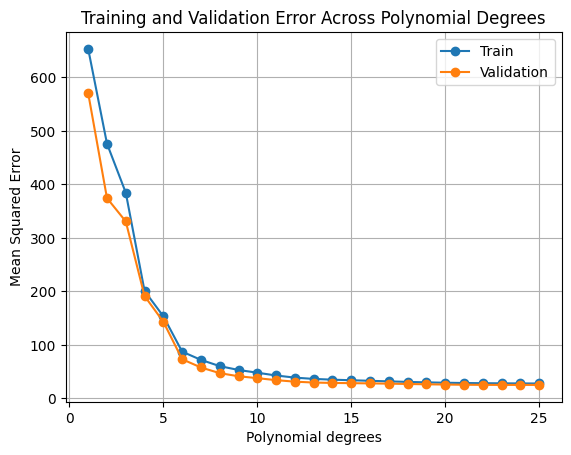

The best model overall, based on MSE performance, has a degree 24 and a MSE:25.1482


In [5]:
def Ridge_noint(X_train,X_val,z_train,z_val,start_degree,degree, plot = False):
    
    mse_train = []
    mse_val = []
    best_lamb_mse= []
    betas= []
    
    for i in range(start_degree, degree+1):
        poly = PolynomialFeatures(degree=i)
        
        # Transform the original training and testing sets without overwriting
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Scaling Data
        scaler = StandardScaler()
        X_train_poly = scaler.fit_transform(X_train_poly)
        X_val_poly = scaler.transform(X_val_poly)
        
        # Removing the intercept
        X_train_poly = X_train_poly[:,1:]
        X_val_poly = X_val_poly[:,1:]
        
        result = lambda_ridge_noint(X_train_poly, X_val_poly,z_train,z_val)

        best_lamb_mse.append(result[0])
        mse_val.append(result[1])
        mse_train.append(result[2])
        betas.append(result[3])
        print(f"The best model with degree: {i} has a lambda:{best_lamb_mse[-1]} and a MSE:{mse_val[-1]}")
        
        if mse_val[-1] == min(mse_val): # Saving the best model based on validation MSE
            best_model = result[3]


    if plot==True:

        # Complexity and MSE plot 
        plt.plot([i for i in range(start_degree, degree + 1)], mse_train, label="Train",marker='o')
        plt.plot([i for i in range(start_degree, degree + 1)], mse_val, label="Validation",marker='o')
        plt.xlabel("Polynomial degrees")
        plt.ylabel("Mean Squared Error")
        plt.title("Training and Validation Error Across Polynomial Degrees")
        plt.legend()
        plt.grid(True)
        plt.savefig("REAL_ridge_MSE.png")
        plt.show()
    
        
    idx = mse_val.index(min(mse_val)) 
    print(f"The best model overall, based on MSE performance, has a degree {idx+start_degree} and a MSE:{round(mse_val[idx],4)}")
  
    return best_model
    
    
def lambda_ridge_noint(X_train_poly, X_val_poly, z_train, z_val):
    
    lambdas = [0.0001,0.001,0.01,0.1,1]
    
    mse_train = []
    mse_val = []
    betas = []

    for lmb in lambdas:
        
        # Ridge regression
        ridge = Ridge(alpha=lmb, fit_intercept=False, max_iter = 10_000)
        model = ridge.fit(X_train_poly, z_train)
        
        # TRAIN - Calculate MSE for training data
        intercept = np.mean(z_train) - np.dot(np.mean(X_train_poly, axis=0), model.coef_) # Data is normalized so intercept = np.mean(z_train)
        z_hat_train = model.predict(X_train_poly) + intercept                             # Since np.mean(X_train_poly)==0 now the second term will be simplified
        mse_train.append(mean_squared_error(z_train, z_hat_train))

        # VALIDATION - Calculate MSE for validation data
        z_hat_val = model.predict(X_val_poly) + intercept
        mse_val.append(mean_squared_error(z_val, z_hat_val))
        
        # Change this line to ensure intercept is a 1D array
        all_betas = np.concatenate([[intercept], model.coef_])  # Wrap intercept in a list
        betas.append(all_betas)
        
    idx = mse_val.index(min(mse_val))
    
    return lambdas[idx], min(mse_val), mse_train[idx], betas[idx]
 
start_degree= 1
degree= 25

betas_ridge_noint = Ridge_noint(X_train,X_val,z_train,z_val,start_degree,degree, True)

# Lasso no intercept

The best model with degree: 1 has a lambda:1 and a MSE:569.2241804180321
The best model with degree: 2 has a lambda:0.01 and a MSE:374.3059410579275
The best model with degree: 3 has a lambda:0.01 and a MSE:330.24040233421755
The best model with degree: 4 has a lambda:0.0001 and a MSE:187.73537956799817
The best model with degree: 5 has a lambda:0.0001 and a MSE:181.96900091144622
The best model with degree: 6 has a lambda:0.0001 and a MSE:168.33907002856964
The best model with degree: 7 has a lambda:0.0001 and a MSE:147.26309411240692
The best model with degree: 8 has a lambda:0.0001 and a MSE:127.70174849266797
The best model with degree: 9 has a lambda:0.0001 and a MSE:114.21664176293669
The best model with degree: 10 has a lambda:0.0001 and a MSE:105.95152600546814
The best model with degree: 11 has a lambda:0.0001 and a MSE:101.85229647951807
The best model with degree: 12 has a lambda:0.0001 and a MSE:100.44839282232574
The best model with degree: 13 has a lambda:0.0001 and a MSE

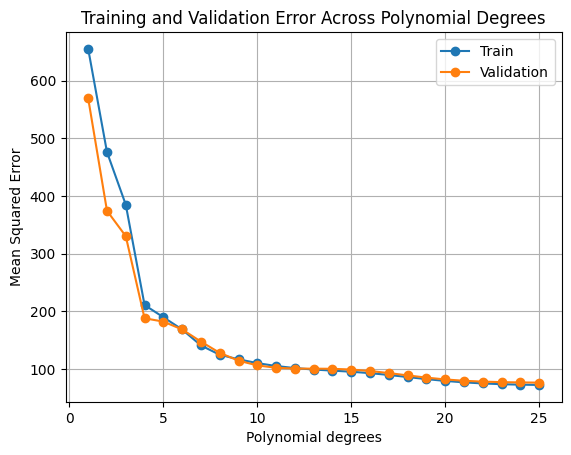

The best model overall, based on MSE performance, has a degree 25 and a MSE:76.03674226325934


In [6]:
def Lasso_noint(X_train,X_val,z_train,z_val,start_degree, degree, plot = False):
    
    mse_train = []
    mse_val = []
    best_lamb_mse= []
    betas= []
    
    for i in range(start_degree,degree+1):
        
        poly = PolynomialFeatures(degree=i)
        
        # Transform the original training and testing sets without overwriting
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        
        # Scaling the data
        scaler = StandardScaler()
        X_train_poly = scaler.fit_transform(X_train_poly)
        X_val_poly = scaler.transform(X_val_poly)
        
        # Removing the intercept
        X_train_poly = X_train_poly[:,1:]
        X_val_poly = X_val_poly[:,1:]
        
        result = lambda_lasso_noint(X_train_poly, X_val_poly,z_train,z_val)
        
        best_lamb_mse.append(result[0])
        mse_val.append(result[1])
        mse_train.append(result[2])
        betas.append(result[3])
        
        print(f"The best model with degree: {i} has a lambda:{best_lamb_mse[-1]} and a MSE:{mse_val[-1]}")
        
        if mse_val[-1] == min(mse_val): # Saving the best model based on validation MSE
            best_model = result[3]

    if plot==True:

        # Complexity and MSE plot
        plt.plot([i for i in range(start_degree, degree + 1)], mse_train, label="Train",marker='o')
        plt.plot([i for i in range(start_degree, degree + 1)], mse_val, label="Validation",marker='o')
        plt.xlabel("Polynomial degrees")
        plt.ylabel("Mean Squared Error")
        plt.title("Training and Validation Error Across Polynomial Degrees")
        plt.legend()
        plt.grid(True)
        plt.savefig("REAL_lasso_MSE.png")
        plt.show()

    idx = mse_val.index(min(mse_val)) 
    print(f"The best model overall, based on MSE performance, has a degree {idx+start_degree} and a MSE:{mse_val[idx]}")
    
    return best_model


def lambda_lasso_noint(X_train_poly, X_val_poly, z_train, z_val):
    
    lambdas = [0.0001,0.001,0.01,0.1,1]
    
    mse_train = []
    mse_val = []
    params = []
    
    for lmb in lambdas:
        
        # train model
        model = linear_model.Lasso(lmb, max_iter=10000, fit_intercept = False) 
        
        # fit model
        model.fit(X_train_poly, z_train)

        # Intercept
        intercept = np.array([np.mean(z_train)- (np.mean(X_train_poly,axis = 0) @ model.coef_)])
        betas = np.concatenate([intercept, model.coef_])
        params.append(betas)
        
        # Train
        z_hat_train = model.predict(X_train_poly) + intercept
        mse_train.append(mean_squared_error(z_train, z_hat_train))

        # Validation
        z_hat_val = model.predict(X_val_poly) + intercept
        mse_val.append(mean_squared_error(z_val, z_hat_val))
        
    
    idx = mse_val.index(min(mse_val))
    
    return lambdas[idx], min(mse_val), mse_train[idx], params[idx]
    
start_degree= 1
degree= 25

betas_lasso_noint = Lasso_noint(X_train,X_val,z_train,z_val,start_degree, degree, plot= True)

# Cross-Validation 

In [16]:
# Load the terrain
terrain = imageio.imread('SRTM_data_Norway_1.tif')

# Design Matrix creation and target variable
terrain_sample=terrain[:50,:50]
height, width = terrain_sample.shape

x = np.arange(0, width)
y = np.arange(0, height) 

x, y = np.meshgrid(x, y)
X = np.column_stack((x.ravel(), y.ravel()))
z = terrain_sample.ravel()

# Splitting into train and test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=32)

## OLS CV

Model of 1 degree has scores: 647.1550042236543
Model of 2 degree has scores: 470.72506010589586
Model of 3 degree has scores: 385.79513709157607
Model of 4 degree has scores: 203.30635552359786
Model of 5 degree has scores: 156.5869256848369
Model of 6 degree has scores: 86.87938964623814
Model of 7 degree has scores: 64.97045475020488
Model of 8 degree has scores: 45.83769606437693
Model of 9 degree has scores: 32.590868436906874
Model of 10 degree has scores: 27.13131933809844
Model of 11 degree has scores: 23.200363289661833
Model of 12 degree has scores: 20.81832726660282
Model of 13 degree has scores: 19.212601675866736
Model of 14 degree has scores: 16.25850445654034
Model of 15 degree has scores: 17.162593884818072
Model of 16 degree has scores: 13.713850537378878
Model of 17 degree has scores: 17.783244389783583
Model of 18 degree has scores: 16.07679562516092
Model of 19 degree has scores: 27.71815193353468
Model of 20 degree has scores: 14.505182448403303
Model of 21 degree 

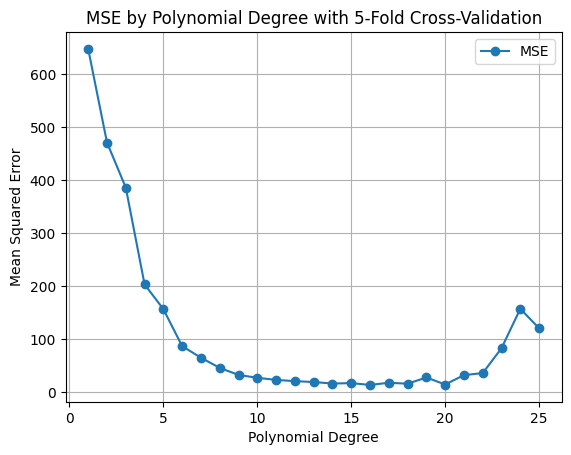

The best model has 16 degree(s) with an MSE of 13.7139.
Model of 1 degree has scores: 646.6874277767479
Model of 2 degree has scores: 468.5452922552842
Model of 3 degree has scores: 383.1483513320943
Model of 4 degree has scores: 202.71670787061186
Model of 5 degree has scores: 156.98197275117485
Model of 6 degree has scores: 85.63678572549365
Model of 7 degree has scores: 65.77964526842267
Model of 8 degree has scores: 45.48967170229336
Model of 9 degree has scores: 32.50273856457925
Model of 10 degree has scores: 27.4017407060621
Model of 11 degree has scores: 23.01297072768535
Model of 12 degree has scores: 20.61898384210586
Model of 13 degree has scores: 19.326976397929904
Model of 14 degree has scores: 15.781866763869436
Model of 15 degree has scores: 17.030894817868425
Model of 16 degree has scores: 12.271820258556176
Model of 17 degree has scores: 17.873827563577372
Model of 18 degree has scores: 13.690088251468541
Model of 19 degree has scores: 19.59277073311716
Model of 20 deg

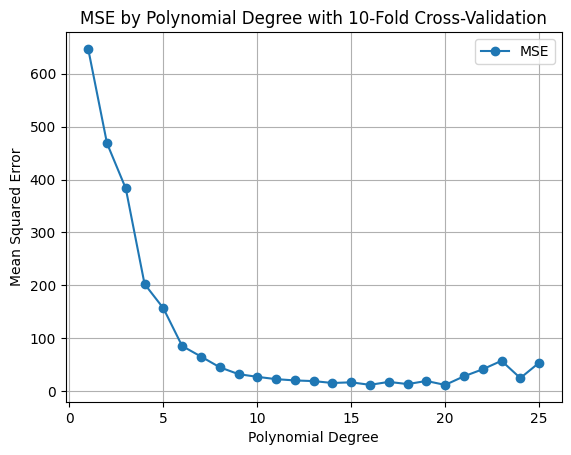

The best model has 20 degree(s) with an MSE of 12.1227.


In [17]:
def ols_CV(X_train, z_train, start_degree, degree,folds, plot=False):


    scores = np.zeros(degree)

    for d in range(start_degree, degree + 1):
        # New features
        poly = PolynomialFeatures(degree=d)

        # Adding new features
        X_train_poly = poly.fit_transform(X_train)

        # Centering data
        scaler = StandardScaler()
        X_train_poly[:, 1:] = scaler.fit_transform(X_train_poly[:, 1:]) # Scale only feature columns

        # Creating a model
        poly_model = LinearRegression(fit_intercept=False)

        # Cross Validation
        cv_scores = cross_val_score(poly_model, X_train_poly, z_train, cv=folds, scoring="neg_mean_squared_error")
        scores[d - start_degree] = np.mean(-cv_scores)
        print(f"Model of {d} degree has scores: {scores[d - start_degree]}")
        
    # Plot 
    if plot:
        plt.plot([i for i in range(start_degree, degree + 1)], scores, label='MSE', marker='o')
        plt.xlabel("Polynomial Degree")
        plt.ylabel("Mean Squared Error")
        plt.title(f"MSE by Polynomial Degree with {folds}-Fold Cross-Validation")
        plt.legend()
        plt.grid(True)
        plt.savefig(f"REAL_CV{folds}_OLS.png")
        plt.show()

    print(f"The best model has {np.argmin(scores) + start_degree} degree(s) with an MSE of {round(np.min(scores), 4)}.")
    
folds = [5,10]
start_degree = 1
degree = 25
for fold in folds:
    ols_CV(X_train, z_train, start_degree, degree, fold, True)

## Ridge CV

The best model with degree = 1 has a lambda = 0.01 and a MSE = 647.1544739517743
The best model with degree = 2 has a lambda = 0.1 and a MSE = 470.7183635648331
The best model with degree = 3 has a lambda = 0.01 and a MSE = 385.7888633006747
The best model with degree = 4 has a lambda = 0.001 and a MSE = 203.30346170652845
The best model with degree = 5 has a lambda = 0.0001 and a MSE = 156.58474864397667
The best model with degree = 6 has a lambda = 0.0001 and a MSE = 90.61995453429027
The best model with degree = 7 has a lambda = 0.0001 and a MSE = 74.08319169849185
The best model with degree = 8 has a lambda = 0.0001 and a MSE = 62.0389608766018
The best model with degree = 9 has a lambda = 0.0001 and a MSE = 54.64994456840416
The best model with degree = 10 has a lambda = 0.0001 and a MSE = 49.84564122378315
The best model with degree = 11 has a lambda = 0.0001 and a MSE = 44.63973086488265
The best model with degree = 12 has a lambda = 0.0001 and a MSE = 40.54582706227127
The best

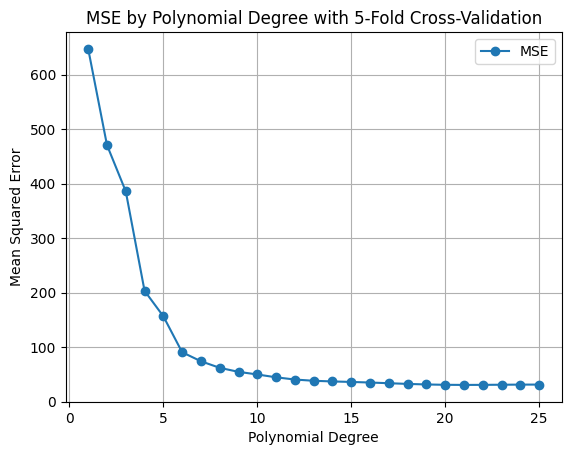

The best model overall, based on MSE performance, has: a degree 21, a MSE = 30.661728759472805 and lambda = 0.0001
The best model with degree = 1 has a lambda = 0.01 and a MSE = 646.6870938066807
The best model with degree = 2 has a lambda = 0.01 and a MSE = 468.54471543689726
The best model with degree = 3 has a lambda = 0.01 and a MSE = 383.1433881839065
The best model with degree = 4 has a lambda = 0.001 and a MSE = 202.70060162211837
The best model with degree = 5 has a lambda = 0.0001 and a MSE = 156.95803087247867
The best model with degree = 6 has a lambda = 0.0001 and a MSE = 88.64383402364464
The best model with degree = 7 has a lambda = 0.0001 and a MSE = 73.98652292586746
The best model with degree = 8 has a lambda = 0.0001 and a MSE = 61.97108059714973
The best model with degree = 9 has a lambda = 0.0001 and a MSE = 54.64436710628161
The best model with degree = 10 has a lambda = 0.0001 and a MSE = 49.37857315476578
The best model with degree = 11 has a lambda = 0.0001 and 

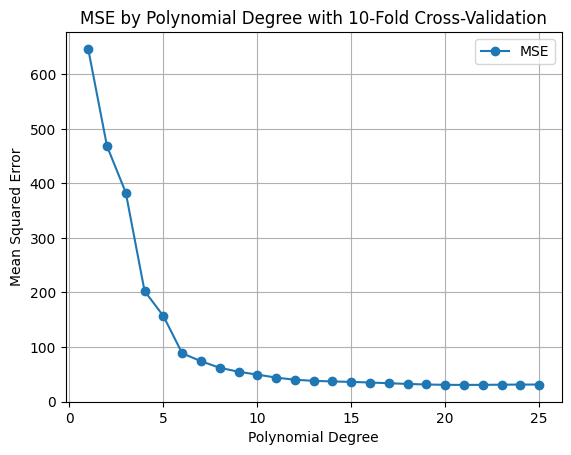

The best model overall, based on MSE performance, has: a degree 21, a MSE = 30.48456732281182 and lambda = 0.0001


In [9]:
def RidgeCV(X_train,z_train,start_degree,degree, folds, plot = False):
    
    tot_scores = []
    best_lambda = []
    
    for i in range(start_degree, degree+1):
        poly = PolynomialFeatures(degree=i)
        
        # Transform the original training and testing sets without overwriting
        X_train_poly = poly.fit_transform(X_train)

        # Scaling data
        scaler = StandardScaler()
        X_train_poly[:, 1:] = scaler.fit_transform(X_train_poly[:, 1:]) # Scale only feature columns

        if plot:
            score = lambda_ridge_cv(X_train_poly,z_train,i, folds,True)    
        else:
            score = lambda_ridge_cv(X_train_poly,z_train,i, folds)
       
        tot_scores.append(score[0])
        best_lambda.append(score[1])

    if plot:
        # Complexity and MSE plot 
        plt.plot([i for i in range(start_degree, degree + 1)], tot_scores, label="MSE",marker='o')
        plt.xlabel("Polynomial Degree")
        plt.ylabel("Mean Squared Error")
        plt.title(f"MSE by Polynomial Degree with {folds}-Fold Cross-Validation")
        plt.legend()
        plt.grid(True)
        plt.savefig(f"REAL_CV{folds}_RIDGE.png")
        plt.show()

    idx = tot_scores.index(min(tot_scores)) 
    print(f"The best model overall, based on MSE performance, has: a degree {idx+start_degree}, a MSE = {min(tot_scores)} and lambda = {best_lambda[idx]}")
        
    return idx+start_degree, min(tot_scores), best_lambda[idx]
    
def lambda_ridge_cv(X_train_poly, z_train, degree, folds, plot = False):
    
    lambdas = [0.0001,0.001,0.01,0.1,1]
    scores = []

    for lmb in lambdas:

        model = Ridge(alpha=lmb, fit_intercept = False)
        
        cv_scores = cross_val_score(model, X_train_poly, z_train, cv= folds, scoring = "neg_mean_squared_error")
        scores.append(np.mean(-cv_scores))

    # if plot:
    #     # Plot MSE
    #     plt.plot([i for i in lambdas], scores, label = "MSE")
    #     plt.xlabel("Lambda")
    #     plt.ylabel("Mean Squared Error")
    #     plt.title(f" degree = {degree}")
    #     plt.legend()
    #     plt.show()
    
    print(f"The best model with degree = {degree} has a lambda = {lambdas[np.argmin(scores)]} and a MSE = {np.min(scores)}")

    return np.min(scores),lambdas[np.argmin(scores)]

folds = [5,10]
start_degree = 1
degree = 25
for fold in folds:
    RidgeCV(X_train, z_train, start_degree, degree, fold, True)

The best model with degree = 1 has a lambda = 0.01 and a MSE = 647.1542829495077
The best model with degree = 2 has a lambda = 0.0001 and a MSE = 470.7258690765849
The best model with degree = 3 has a lambda = 0.0001 and a MSE = 385.7979152033842
The best model with degree = 4 has a lambda = 0.0001 and a MSE = 314.90515120522105
The best model with degree = 5 has a lambda = 0.0001 and a MSE = 254.02264765644594
The best model with degree = 6 has a lambda = 0.0001 and a MSE = 223.46367584138255
The best model with degree = 7 has a lambda = 0.0001 and a MSE = 212.44895205222915
The best model with degree = 8 has a lambda = 0.0001 and a MSE = 211.49269868395294
The best model with degree = 9 has a lambda = 0.0001 and a MSE = 210.64955239462878
The best model with degree = 10 has a lambda = 0.0001 and a MSE = 205.49700777367994
The best model with degree = 11 has a lambda = 0.0001 and a MSE = 189.34714533221396
The best model with degree = 12 has a lambda = 0.0001 and a MSE = 164.917433431

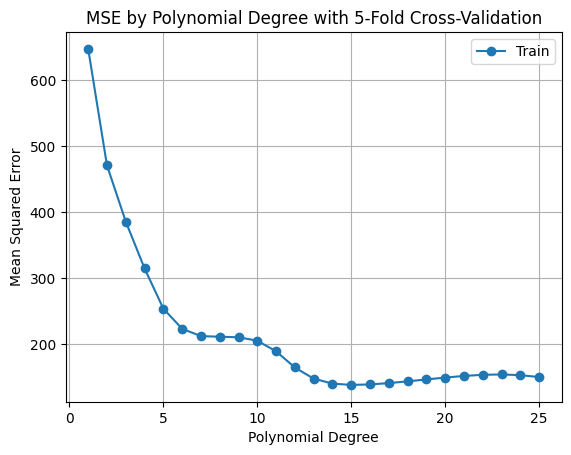

The best model overall, based on MSE performance, has: a degree 15, a MSE = 138.53110246501805 and lambda = 0.0001
The best model with degree = 1 has a lambda = 0.01 and a MSE = 646.6867006491913
The best model with degree = 2 has a lambda = 0.0001 and a MSE = 468.5455046859327
The best model with degree = 3 has a lambda = 0.0001 and a MSE = 383.1512539732605
The best model with degree = 4 has a lambda = 0.0001 and a MSE = 312.6472536940392
The best model with degree = 5 has a lambda = 0.0001 and a MSE = 251.85752500498575
The best model with degree = 6 has a lambda = 0.0001 and a MSE = 221.99104488626554
The best model with degree = 7 has a lambda = 0.0001 and a MSE = 211.4817050745083
The best model with degree = 8 has a lambda = 0.0001 and a MSE = 210.6736473670275
The best model with degree = 9 has a lambda = 0.0001 and a MSE = 209.8276909217935
The best model with degree = 10 has a lambda = 0.0001 and a MSE = 204.5000634330773
The best model with degree = 11 has a lambda = 0.0001 

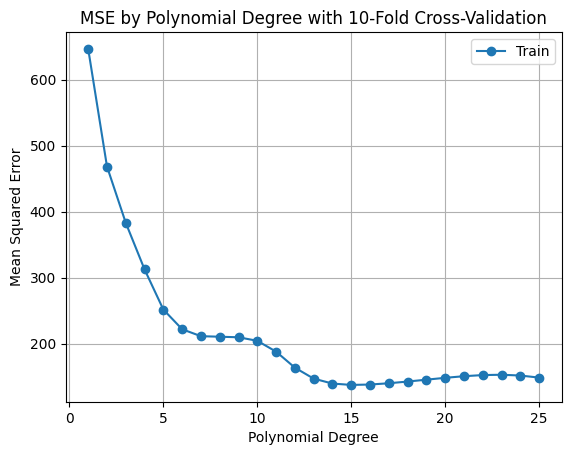

The best model overall, based on MSE performance, has: a degree 15, a MSE = 137.6474078841759 and lambda = 0.0001


In [10]:
def LassoCV(X_train,z_train,start_degree,degree, folds, plot = False):
    
    tot_scores = []
    best_lambda = []
    
    for i in range(start_degree, degree+1):
        poly = PolynomialFeatures(degree=i)
        
        # Transform the original training and testing sets without overwriting
        X_train_poly = poly.fit_transform(X_train)

        # Scaling data
        scaler = StandardScaler()
        X_train_poly[:, 1:] = scaler.fit_transform(X_train_poly[:, 1:]) # Scale only feature columns

        if plot:
            score = lambda_lasso_cv(X_train_poly,z_train,i,folds, True)
        else:
            score = lambda_lasso_cv(X_train_poly,z_train,i,folds)
       
        tot_scores.append(score[0])
        best_lambda.append(score[1])

    if plot:
        # Complexity and MSE plot 
        plt.plot([i for i in range(start_degree, degree + 1)], tot_scores, label="Train", marker='o')
        plt.xlabel("Polynomial Degree")
        plt.ylabel("Mean Squared Error")
        plt.title(f"MSE by Polynomial Degree with {folds}-Fold Cross-Validation")
        plt.legend()
        plt.grid(True)
        plt.savefig(f"REAL_CV{folds}_LASSO.png")
        plt.show()
    
    idx = tot_scores.index(min(tot_scores)) 
    print(f"The best model overall, based on MSE performance, has: a degree {idx+start_degree}, a MSE = {min(tot_scores)} and lambda = {best_lambda[idx]}")

    return idx+start_degree, min(tot_scores), best_lambda[idx]
    
    
def lambda_lasso_cv(X_train_poly, z_train, degree, folds, plot = False):
    
    lambdas = [0.0001,0.001,0.01,0.1,1]
    scores = []

    for lmb in lambdas:

        model = Lasso(alpha=lmb,max_iter=10000, fit_intercept = False)
        
        cv_scores = cross_val_score(model, X_train_poly, z_train, cv= folds, scoring = "neg_mean_squared_error")
        scores.append(np.mean(-cv_scores))

    # if plot:
    #     # Plot MSE
    #     plt.plot([i for i in lambdas], scores, label = "MSE")
    #     plt.xlabel("Lambda")
    #     plt.ylabel("Mean Squared Error")
    #     plt.title(f" degree = {degree}")
    #     plt.legend()
    #     plt.show()
    
    print(f"The best model with degree = {degree} has a lambda = {lambdas[np.argmin(scores)]} and a MSE = {np.min(scores)}")

    return np.min(scores),lambdas[np.argmin(scores)]

folds = [5,10]
start_degree = 1
degree = 25

for fold in folds:
    LassoCV(X_train, z_train, start_degree, degree, fold, True)

# Tables of method and respective MSE 

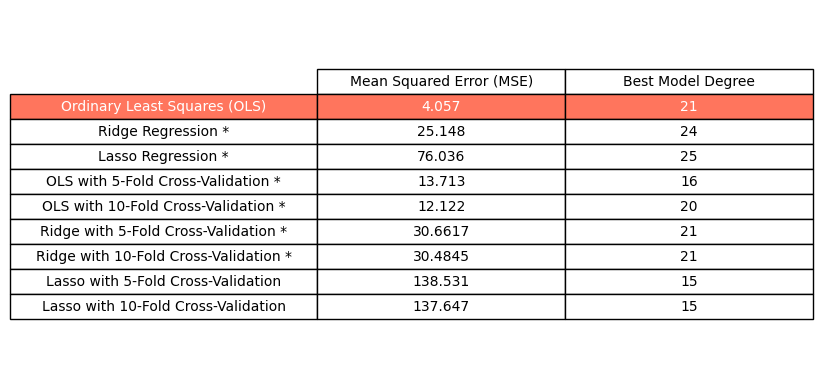

In [12]:
columns = ('Mean Squared Error (MSE)', 'Best Model Degree')
rows = ['Ordinary Least Squares (OLS)', 
        'Ridge Regression *', 
        'Lasso Regression *',
        'OLS with 5-Fold Cross-Validation *', 
        'OLS with 10-Fold Cross-Validation *', 
        'Ridge with 5-Fold Cross-Validation *', 
        'Ridge with 10-Fold Cross-Validation *', 
        'Lasso with 5-Fold Cross-Validation', 
        'Lasso with 10-Fold Cross-Validation']
data = [[4.057, 21],
        [25.148, 24],
        [76.036, 25],
        [13.713, 16],
        [12.122, 20],
        [30.6617, 21],
        [30.4845, 21],
        [138.531, 15],
        [137.647, 15]]

fig, ax = plt.subplots()

# Hide the axes
ax.axis('tight')
ax.axis('off')


table = ax.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center')

table.scale(1, 1.5)

# Set larger space for row labels and centering the text
for key, cell in table.get_celld().items():
    cell.get_text().set_horizontalalignment('center')  
    cell.get_text().set_verticalalignment('center') 
    if key[1] == -1:
        cell.set_width(0.2)  

# Cell having minimum MSE
mse_values = [row[0] for row in data]
min_mse = min(mse_values)
min_index = mse_values.index(min_mse)


table[(min_index+1, 0)].set_facecolor('#ff755d')  
table[(min_index+1, 0)].set_text_props(color='white')  
table[(min_index+1, 1)].set_facecolor('#ff755d')  
table[(min_index+1, 1)].set_text_props(color='white')  
table[(min_index+1, -1)].set_facecolor('#ff755d') 
table[(min_index+1, -1)].set_text_props(color='white')  

plt.savefig("REAL_tablesmall.png", bbox_inches='tight', dpi=300)  
plt.show()

# Performance evaluation on TEST set

In [13]:
# Load the terrain
terrain = imageio.imread('SRTM_data_Norway_1.tif')

# Design Matrix creation and target variable
terrain_sample=terrain[:50,:50]
height, width = terrain_sample.shape

x = np.arange(0, width)
y = np.arange(0, height) 

x, y = np.meshgrid(x, y)
X = np.column_stack((x.ravel(), y.ravel()))
z = terrain_sample.ravel()

# Splitting into train and test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=32)
# Splitting into train and validation
X_train, X_val, z_train, z_val = train_test_split(X_train, z_train, test_size=0.1, random_state=32)

# Best degree 
best_degree = 21  

# 1Polynomial features
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize
scaler = StandardScaler()
X_train_poly[:, 1:] = scaler.fit_transform(X_train_poly[:, 1:])  # Fit and transform train data
X_test_poly[:, 1:] = scaler.transform(X_test_poly[:, 1:])        # Transform test data

# Training
ols_model = LinearRegression()
ols_model.fit(X_train_poly, z_train)

# Prediction
z_pred_test = ols_model.predict(X_test_poly)

# MSE on test set
mse_test = mean_squared_error(z_test, z_pred_test)
print(f"Mean Squared Error on the Test Set: {mse_test}")

Mean Squared Error on the Test Set: 18.249127611094536


### 3D plot

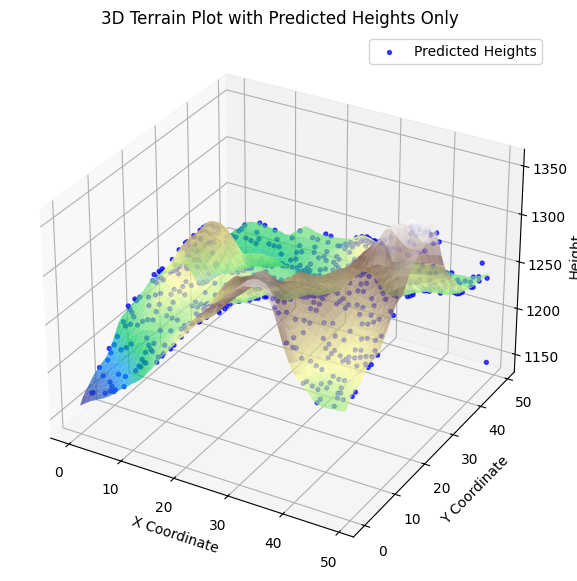

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 3D Plotting of Predicted Points Only
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface of the original terrain for context
ax.plot_surface(x, y, terrain_sample, cmap='terrain', edgecolor='none', alpha=0.7)

# Scatter plot for predicted test points only
ax.scatter(X_test[:, 0], X_test[:, 1], z_pred_test, color='blue', label='Predicted Heights', s=8, alpha=0.7)

# Labeling axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Height')
ax.set_title('3D Terrain Plot with Predicted Heights Only')

# Show legend
ax.legend()

# Show the plot
plt.savefig("REAL_testdata.png")
plt.show()
